# Hydroelectric Sensor

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') # special style template for matplotlib, highly useful for visualizing time series data

In [2]:
# Read data
dfs = pd.read_excel("dataset/data.xlsx")
dfs

## 1. Preview Data

In [3]:
dfs

,Time,T,D mm,Lever water
0,2012-09-08 15:00:00,26.35,-0.272825,203.84
1,2012-09-09 15:00:00,26.55,-0.274590,204.10
2,2012-09-10 15:00:00,26.52,-0.266053,204.47
3,2012-09-11 15:00:00,26.86,-0.261221,204.77
4,2012-09-12 15:00:00,26.94,-0.256358,205.10
...,...,...,...,...
52646,2022-09-25 19:00:00,27.91,0.189796,211.71
52647,2022-09-25 20:00:00,27.87,0.189740,211.74
52648,2022-09-25 21:00:00,27.87,0.190367,211.77
52649,2022-09-25 22:00:00,27.86,0.190916,211.79


In [4]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52651 entries, 0 to 52650
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         52651 non-null  object 
 1   T            52635 non-null  float64
 2   D mm         52651 non-null  float64
 3   Lever water  52651 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.6+ MB


## 2. Data Pre-Prossecing

In [5]:
dfs = dfs.rename(columns = {'T' : 'Temperature',
                            'D mm' : 'Dilation D(mm)'})

In [6]:
#Các giá trị khuyết
print(dfs.isnull().sum())

Time               0
Temperature       16
Dilation D(mm)     0
Lever water        0
dtype: int64


In [7]:
#Xử lí các giá trị khuyết: Xóa bỏ do số lượng giá trị khuyết không quá nhiều và ít ảnh hưởng đến kết quả cuối
dfs = dfs.dropna()

In [8]:
# Parsing dates:
dfs['Time'] = pd.to_datetime(dfs['Time'], format='%Y-%m-%d %H:%M:%S')
dfs.set_index('Time', inplace=True) #set date as index
dfs.head(10)

,Temperature,Dilation D(mm),Lever water
Time,,,
2012-09-08 15:00:00,26.35,-0.272825,203.84
2012-09-09 15:00:00,26.55,-0.274590,204.10
2012-09-10 15:00:00,26.52,-0.266053,204.47
2012-09-11 15:00:00,26.86,-0.261221,204.77
2012-09-12 15:00:00,26.94,-0.256358,205.10
2012-09-13 15:00:00,26.82,-0.252706,205.62
2012-09-14 15:00:00,25.85,-0.234901,206.43
2012-09-15 15:00:00,25.41,-0.238064,207.19
2012-09-16 09:00:00,26.12,-0.220772,207.58


In [9]:
dfs.describe()

,Temperature,Dilation D(mm),Lever water
count,52635.000000,52635.000000,52635.000000
mean,24.976204,-0.533901,203.991060
std,10.220573,12.897712,10.302321
min,-99.000000,-160.744246,175.810000
25%,23.680000,0.057944,196.630000
50%,26.080000,0.264145,206.460000
75%,27.880000,0.983092,213.410000
max,217.500000,3.101148,217.150000


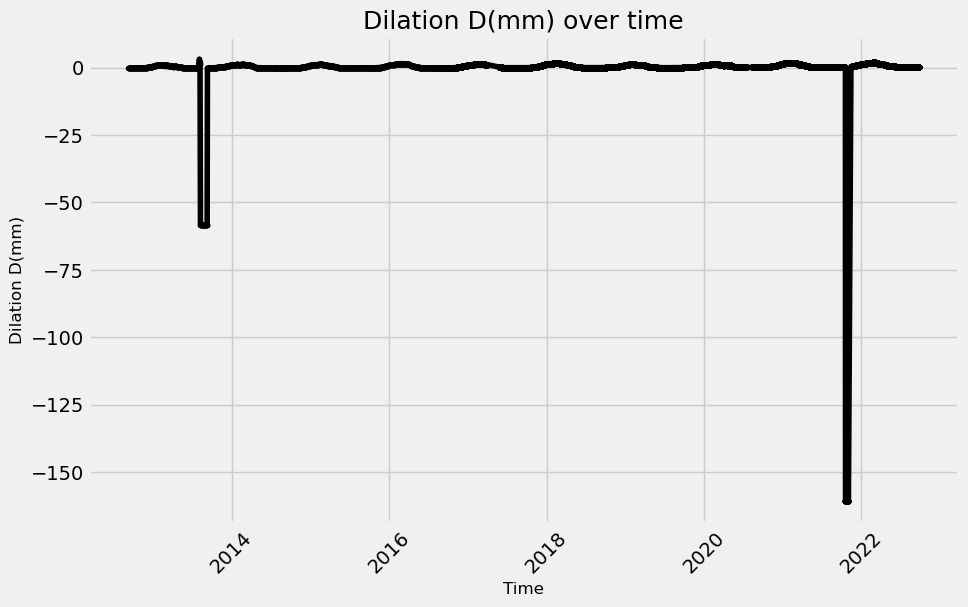

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(dfs["Dilation D(mm)"], marker=".", color="k")
plt.xticks(rotation=45)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Dilation D(mm)", fontsize=12)
plt.title("Dilation D(mm) over time", fontsize=18)
plt.show()

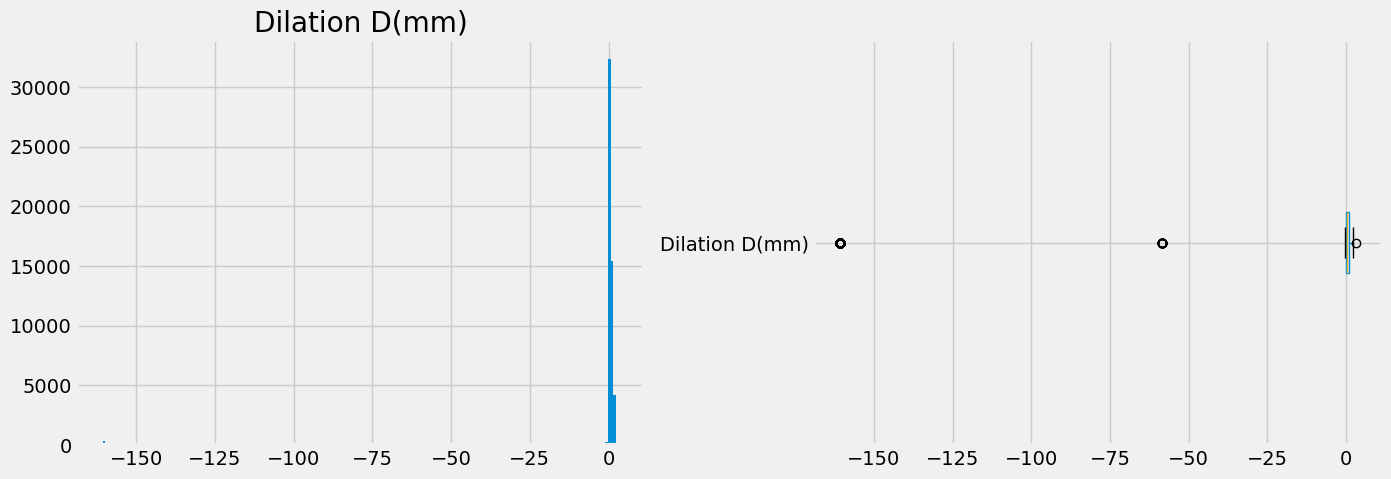

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
dfs[['Dilation D(mm)']].hist(bins=200, ax=axes[0]);
dfs[['Dilation D(mm)']].boxplot(ax=axes[1], vert=False);

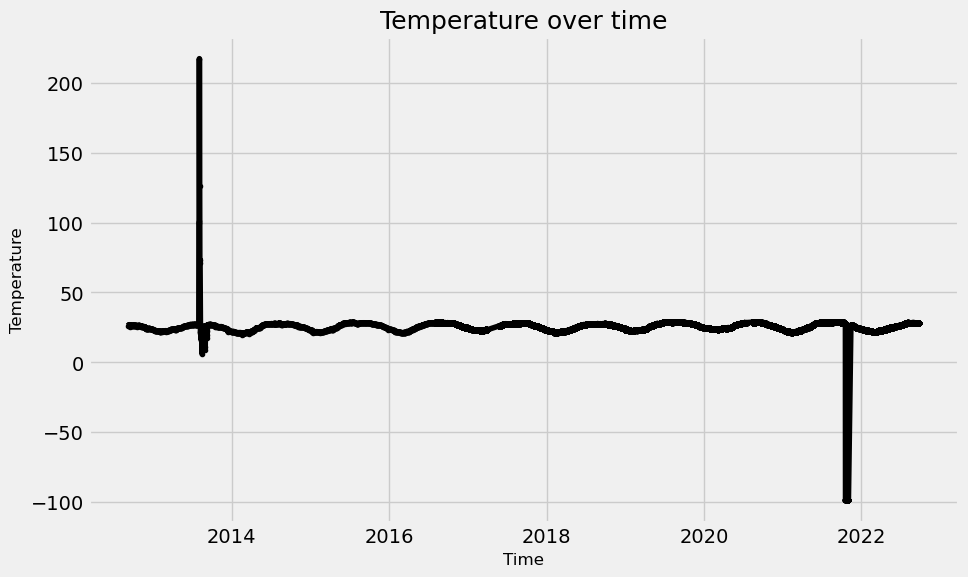

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(dfs["Temperature"], marker=".", color="k")
plt.xlabel("Time", fontsize=12)
plt.ylabel("Temperature", fontsize=12)
plt.title("Temperature over time", fontsize=18)
plt.show()

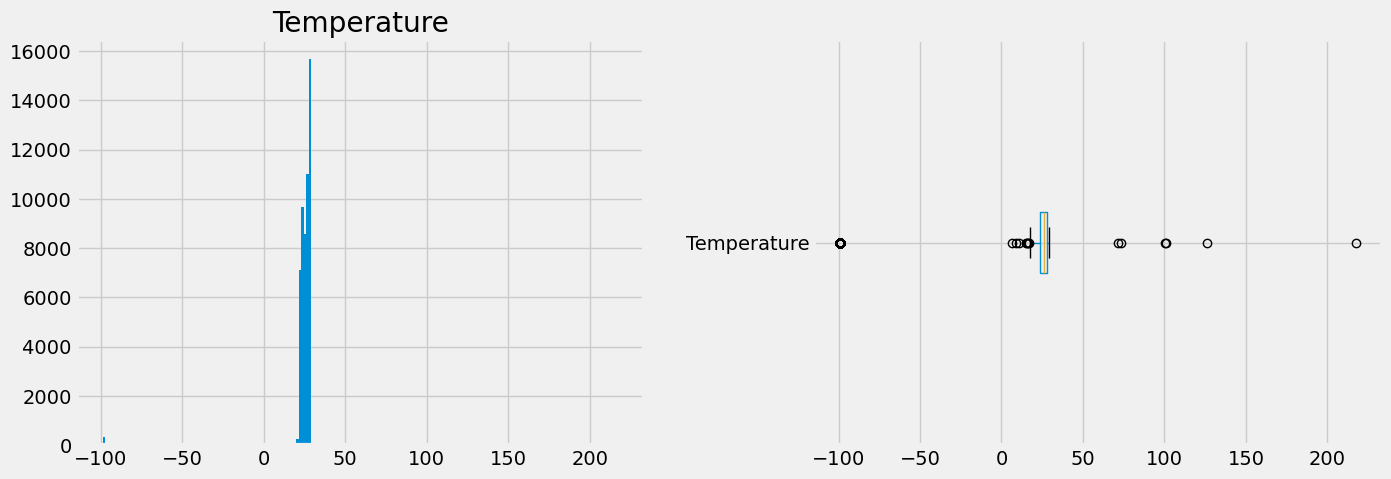

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
dfs[['Temperature']].hist(bins=200, ax=axes[0]);
dfs[['Temperature']].boxplot(ax=axes[1], vert=False);

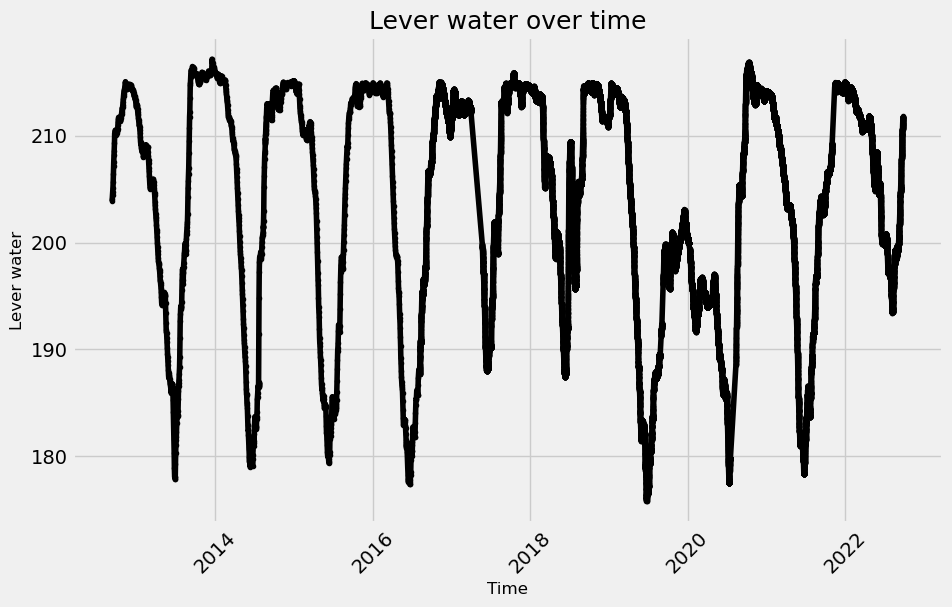

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(dfs["Lever water"], marker=".", color="k")
plt.xticks(rotation=45)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Lever water", fontsize=12)
plt.title("Lever water over time", fontsize=18)
plt.show()

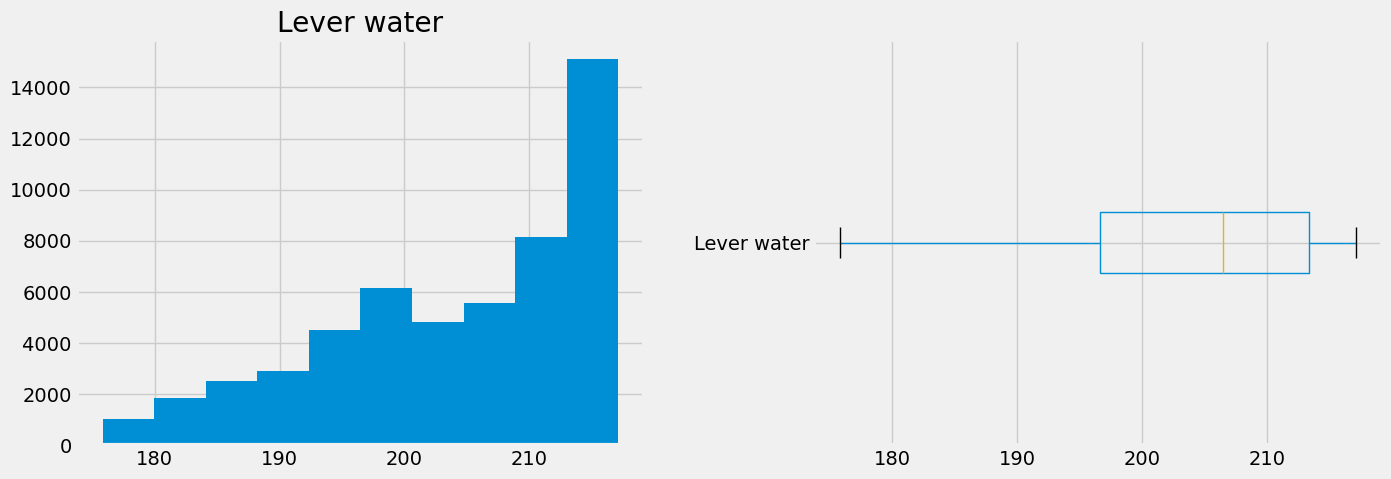

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
dfs[['Lever water']].hist(bins=10, ax=axes[0]);
dfs[['Lever water']].boxplot(ax=axes[1], vert=False);

In [16]:
# Dựa trên IQR, outliers sẽ được xác định nếu nằm ngoài miền giá trị cao nhất và miền giá trị thấp nhất

def detect_outliers(series): #series: 1-D numpy array input
# Tính toán giá trị Q1, Q3 và IQR
  Q1 = np.quantile(series, 0.25)
  Q3 = np.quantile(series, 0.75)
  IQR = Q3-Q1
# Định nghĩa ngưỡng cho việc xác định outlier
  lower_bound = Q1-1.5*IQR
  upper_bound = Q3+1.5*IQR
# Loại bỏ các outlier
  lower_compare = series <= lower_bound
  upper_compare = series >= upper_bound
  outliers = series[(series < lower_bound) | (series > upper_bound)]
  return outliers


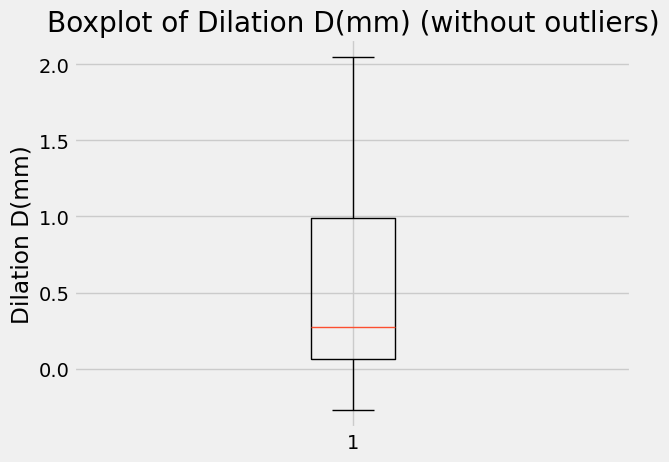

Outlier day:  []
Outlier values:  [   3.1011476   -58.37688527  -58.3845612   -58.36484201  -58.40128059
  -58.36095994  -58.35950416  -58.39867784  -58.44508629  -58.39329587
  -58.40317751  -58.39210478  -58.39161952  -58.36563608  -58.40591261
  -58.38376713  -58.38539937  -58.36056291  -58.37017987  -58.35976885
  -58.3569014   -58.42461716  -58.39179597  -58.43220486  -58.37110627
  -58.36219514  -58.3854876   -58.35853364  -58.3669154   -58.37273851
  -58.38509057  -58.37225325  -58.39479576 -160.74424632 -160.74424632
 -160.74424632 -160.74424632 -160.74424632 -160.74424632 -160.74424632
 -160.74424632 -160.74424632 -160.74424632 -160.74424632 -160.74424632
 -160.74424632 -160.74424632 -160.74424632 -160.74424632 -160.74424632
 -160.74424632 -160.74424632 -160.74424632 -160.74424632 -160.74424632
 -160.74424632 -160.74424632 -160.74424632 -160.74424632 -160.74424632
 -160.74424632 -160.74424632 -160.74424632 -160.74424632 -160.74424632
 -160.74424632 -160.74424632 -160.74424632 

In [17]:
outliers_dilation = detect_outliers(dfs['Dilation D(mm)'])

# Loại bỏ các outlier trong cột Dilation D(mm) trong dfs
dfs = dfs[~dfs['Dilation D(mm)'].isin(outliers_dilation)]

# Boxplot sau khi loại bỏ outlier
plt.boxplot(dfs['Dilation D(mm)'])
plt.ylabel('Dilation D(mm)')
plt.title('Boxplot of Dilation D(mm) (without outliers)')
plt.show()

print("Outlier day: ", dfs.index[dfs['Dilation D(mm)'].isin(outliers_dilation)].values)
print("Outlier values: ", outliers_dilation.values)

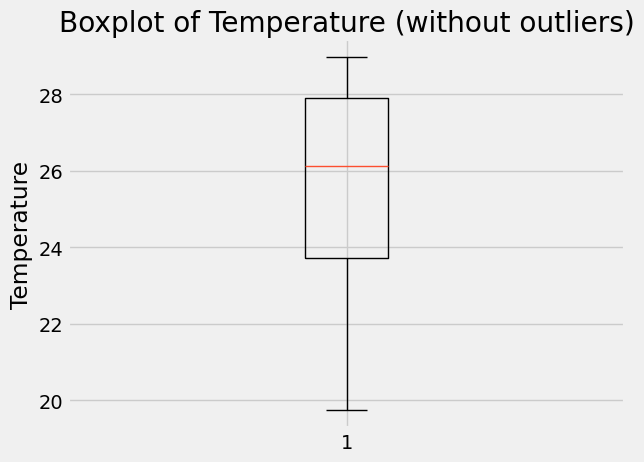

Outlier day:  []
Outlier values:  [100.1  101.2  126.4   71.3   73.37]


In [18]:
outliers_temperature = detect_outliers(dfs['Temperature'])

# Loại bỏ các outlier trong cột Temperature trong dfs
dfs = dfs[~dfs['Temperature'].isin(outliers_temperature)]

# Boxplot sau khi loại bỏ outlier
plt.boxplot(dfs['Temperature'])
plt.ylabel('Temperature')
plt.title('Boxplot of Temperature (without outliers)')
plt.show()

print("Outlier day: ", dfs.index[dfs['Temperature'].isin(outliers_temperature)].values)
print("Outlier values: ", outliers_temperature.values)

In [19]:
dfs.describe()

,Temperature,Dilation D(mm),Lever water
count,52263.000000,52263.000000,52263.000000
mean,25.761153,0.525135,203.968408
std,2.262410,0.571692,10.333459
min,19.730000,-0.274590,175.810000
25%,23.720000,0.062077,196.580000
50%,26.110000,0.274159,206.380000
75%,27.890000,0.986826,213.430000
max,28.970000,1.971190,217.150000


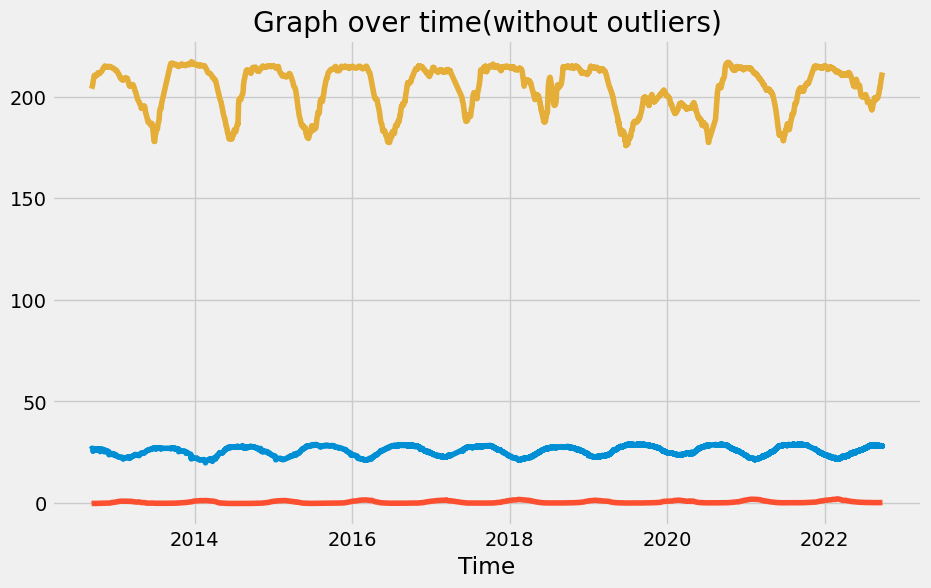

In [20]:
plt.figure(figsize=(10, 6))
plt.xlabel('Time')
plt.title('Graph over time(without outliers)')
plt.plot(dfs)

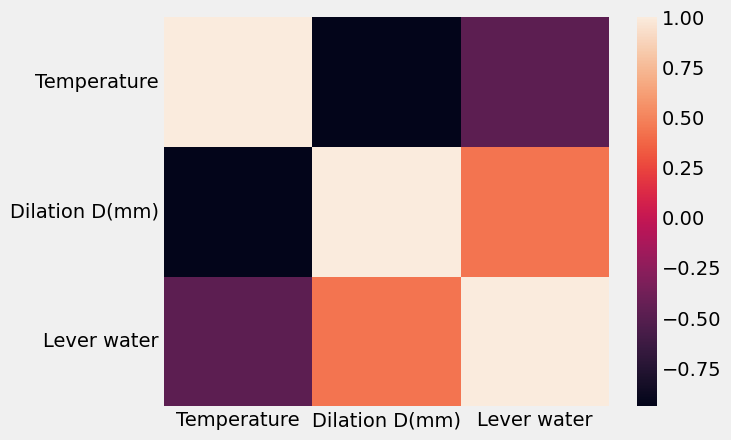

In [21]:
dataplot = sns.heatmap(dfs.corr())
plt.show()

In [22]:
dfs.head(10)

,Temperature,Dilation D(mm),Lever water
Time,,,
2012-09-08 15:00:00,26.35,-0.272825,203.84
2012-09-09 15:00:00,26.55,-0.274590,204.10
2012-09-10 15:00:00,26.52,-0.266053,204.47
2012-09-11 15:00:00,26.86,-0.261221,204.77
2012-09-12 15:00:00,26.94,-0.256358,205.10
2012-09-13 15:00:00,26.82,-0.252706,205.62
2012-09-14 15:00:00,25.85,-0.234901,206.43
2012-09-15 15:00:00,25.41,-0.238064,207.19
2012-09-16 09:00:00,26.12,-0.220772,207.58


In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(dfs['Lever water'], model='multiplicative')
result.plot()
plt.show()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(dfs['Dilation D(mm)'], model='additive')
result.plot()
plt.show()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

### 2. Stationarising the time series

Đầu tiên, chúng ta cần kiểm tra xem một chuỗi có phải là ổn định hay không.

### Kiểm định ADF (Augmented Dickey-Fuller)
Kiểm định Dickey-Fuller là một trong những kiểm định thống kê phổ biến nhất. Nó được sử dụng để xác định sự tồn tại của đơn vị gốc trong chuỗi, và từ đó giúp chúng ta hiểu xem chuỗi có ổn định hay không. Giả thuyết không và giả thuyết thay thế của kiểm định này là:

#### Giả thuyết không (Null Hypothesis): Chuỗi có đơn vị gốc (giá trị a = 1)

#### Giả thuyết thay thế (Alternate Hypothesis): Chuỗi không có đơn vị gốc.

Nếu chúng ta không thể bác bỏ giả thuyết không, ta có thể nói rằng chuỗi không ổn định. Điều này có nghĩa là chuỗi có thể là chuỗi tuyến tính hoặc chuỗi ổn định qua việc chênh lệch.

Nếu cả trung bình và độ lệch chuẩn đều là đường thẳng ngang (trung bình không đổi và phương sai không đổi), thì chuỗi trở nên ổn định.

The following function is one that can plot a series with its rolling mean and standard deviation.

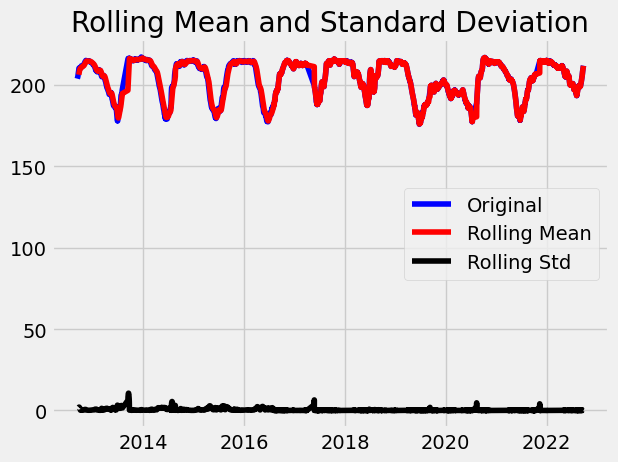

Results of Dickey-Fuller test
Test Statistic                    -4.310635
p-value                            0.000426
Number of Lags Used               58.000000
Number of Observations Used    52204.000000
Critical Value (1%)               -3.430475
Critical Value (5%)               -2.861595
Critical Value (10%)              -2.566799
dtype: float64


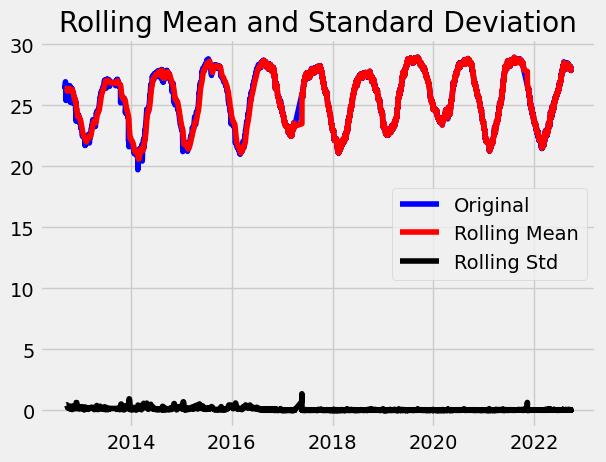

Results of Dickey-Fuller test
Test Statistic                    -4.412131
p-value                            0.000282
Number of Lags Used               58.000000
Number of Observations Used    52204.000000
Critical Value (1%)               -3.430475
Critical Value (5%)               -2.861595
Critical Value (10%)              -2.566799
dtype: float64


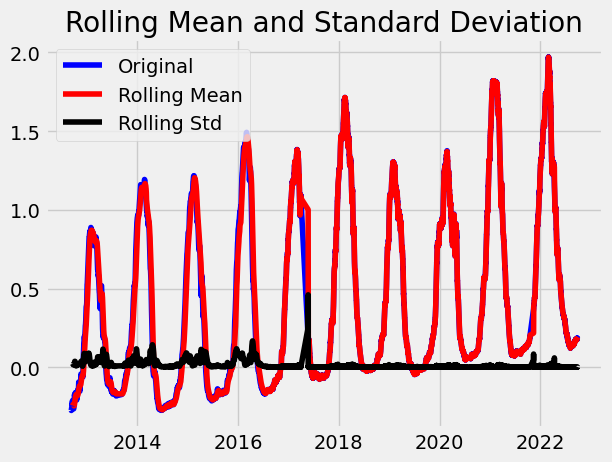

Results of Dickey-Fuller test
Test Statistic                    -3.620439
p-value                            0.005382
Number of Lags Used               58.000000
Number of Observations Used    52204.000000
Critical Value (1%)               -3.430475
Critical Value (5%)               -2.861595
Critical Value (10%)              -2.566799
dtype: float64


In [ ]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    # Plot rolling statistics
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show()

    # Perform Dickey-Fuller test
    print("Results of Dickey-Fuller test")
    adft = adfuller(timeseries, autolag='AIC')
    # Output for adft will give us without defining what the values are.
    # Hence, we manually write what values it explains using a for loop
    output = pd.Series(adft[0:4], index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in adft[4].items():
        output['Critical Value (%s)' % key] = value
    print(output)

test_stationarity(dfs['Lever water'])
test_stationarity(dfs['Temperature'])
test_stationarity(dfs['Dilation D(mm)'])

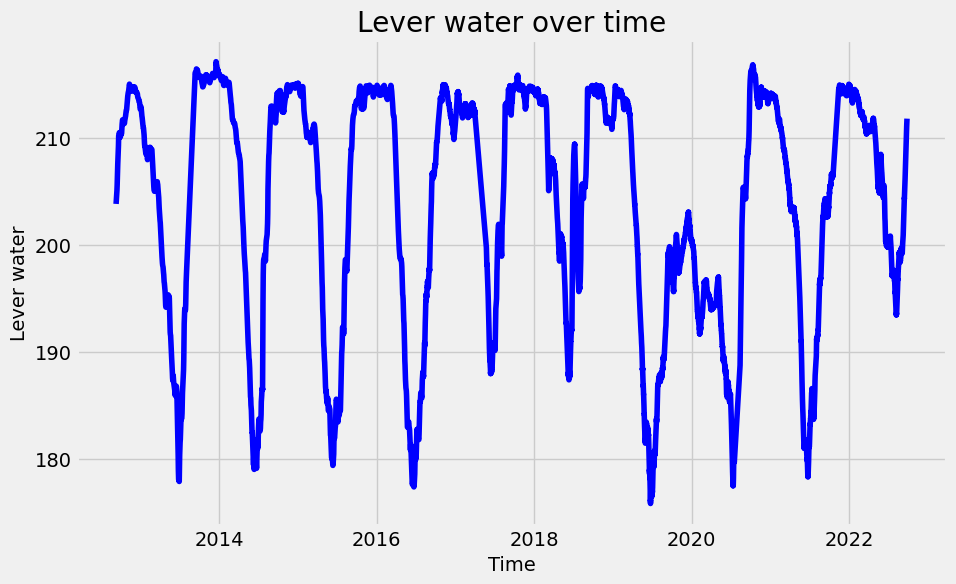

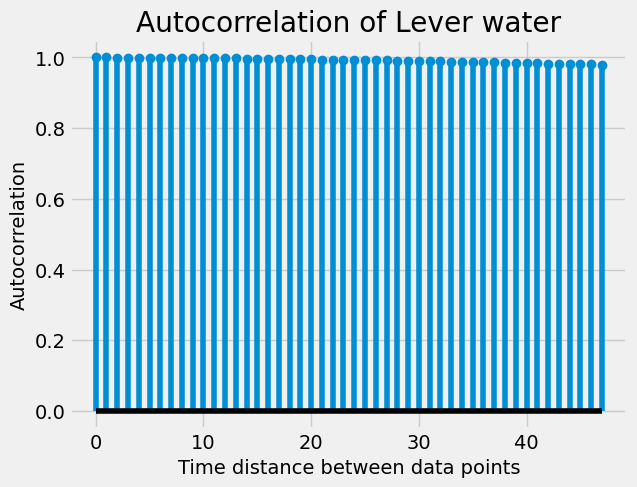

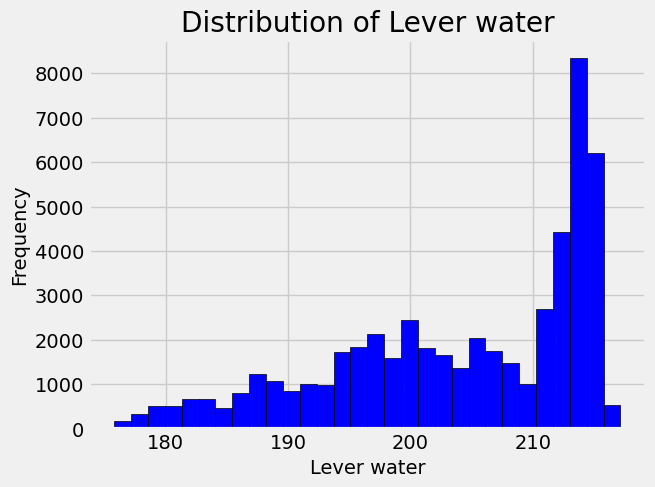

In [ ]:
import statsmodels.api as sm

# Kiểm tra đồng nhất (visual inspection)
plt.figure(figsize=(10, 6))
plt.plot(dfs.index, dfs['Lever water'], color='blue')
plt.xlabel('Time')
plt.ylabel('Lever water')
plt.title('Lever water over time')
plt.show()

# Kiểm tra sự không tự tương quan (autocorrelation)
acf_values, confint = sm.tsa.stattools.acf(dfs['Lever water'], alpha=0.05)
lag = np.arange(len(acf_values))
plt.stem(lag, acf_values, linefmt='C0-', markerfmt='C0o', basefmt='k-')
plt.xlabel('Time distance between data points')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Lever water')
plt.show()


# Kiểm tra phân phối của chuỗi
plt.hist(dfs['Lever water'], bins=30, color='blue', edgecolor='black')
plt.xlabel('Lever water')
plt.ylabel('Frequency')
plt.title('Distribution of Lever water')
plt.show()

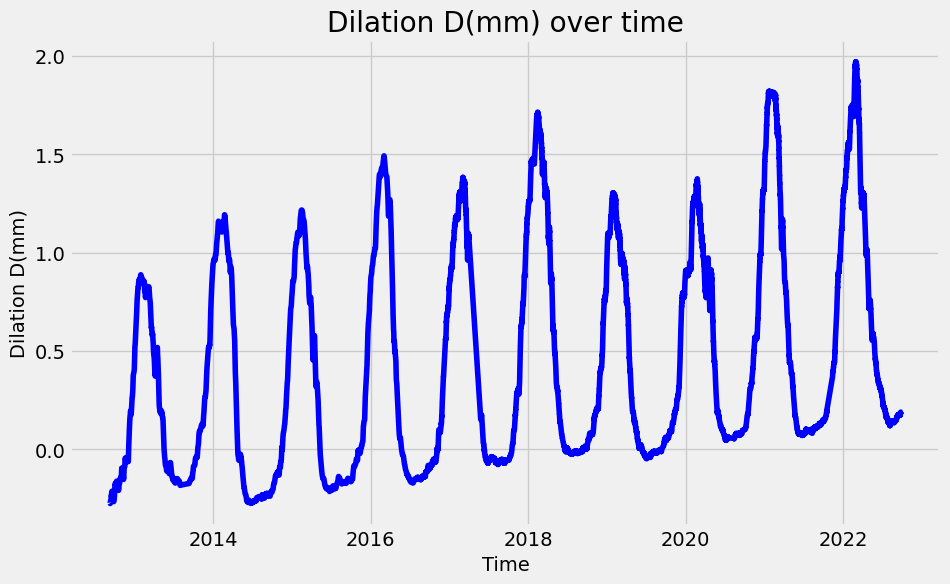

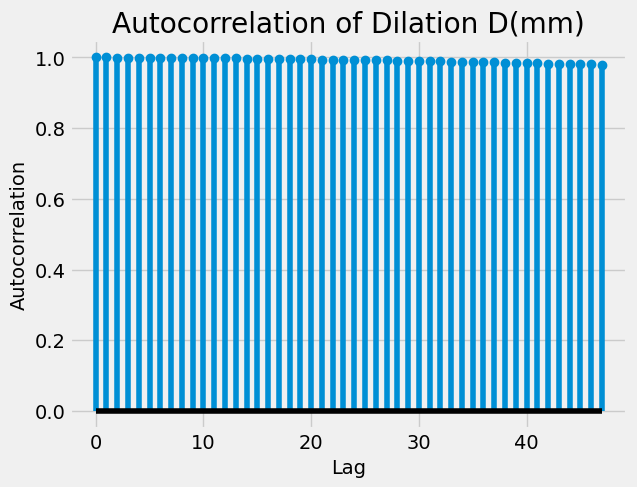

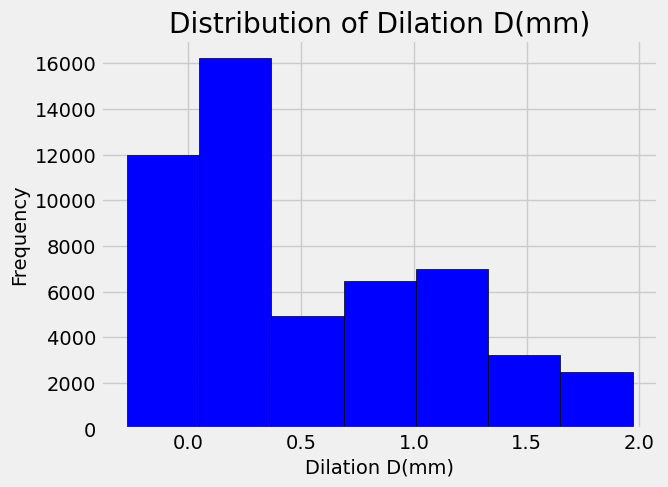

In [ ]:
# Kiểm tra đồng nhất (visual inspection)
plt.figure(figsize=(10, 6))
plt.plot(dfs.index, dfs['Dilation D(mm)'], color='blue')
plt.xlabel('Time')
plt.ylabel('Dilation D(mm)')
plt.title('Dilation D(mm) over time')
plt.show()

# Kiểm tra sự không tự tương quan (autocorrelation)
acf_values, confint = sm.tsa.stattools.acf(dfs['Lever water'], alpha=0.05)
lag = np.arange(len(acf_values))
plt.stem(lag, acf_values, linefmt='C0-', markerfmt='C0o', basefmt='k-')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Dilation D(mm)')
plt.show()


# Kiểm tra phân phối của chuỗi
plt.hist(dfs['Dilation D(mm)'], bins=7, color='blue', edgecolor='black')
plt.xlabel('Dilation D(mm)')
plt.ylabel('Frequency')
plt.title('Distribution of Dilation D(mm)')
plt.show()

#